# Calcule statistice pe baza seturilor de date

## Exemple simple, pe seturi mici

Considerăm o listă generată aleatoriu, cu un număr aleatoriu de elemente (între 100 și 1000), elementele fiind între 0 și 10, pe care facem calcule statistice.

In [16]:
import random
import math

count = random.randint(100, 1000)

# declarată cu sintaxa "list comprehension"
date = [random.randint(0, 10) for i in range(count)]

# alternativa clasică
date = []
for i in range(count):
    date.append(random.randint(0,10))

# calculăm suma elementelor cu funcția `sum'
media = sum(date) / len(date)

# alternativa clasică
suma = 0
for data in date:
    suma += data
media = suma/len(date)
print(f"Media setului de date este {media}")

# ponderi generate aleatoriu, între 0 și 1 -- cu list comprehension
ponderi = [random.random() for i in range(count)] # random.random() returnează automat între 0 și 1
media_ponderata = 0
for i in range(count):
    media_ponderata += date[i] * ponderi[i]
media_ponderata = media_ponderata / len(date)
print(f"Media ponderată cu ponderi aleatorii între 0 și 1 este {media_ponderata}")

# mediana = valoarea care apare în mijlocul setului de date
if count % 2 == 0:
    mediana = (date[count//2] + date[count//2 + 1])/2
else:
    mediana = (date[count//2 + 1])
print(f"Avem {count} elemente în set, cu mediana {mediana}")

# modul: elementul care apare cel mai des
# ideea: creăm o listă în care păstrăm elementele fără dubluri,
# apoi numărăm aparițiile acelora
date_uniq = []
for elt in date:
    if elt not in date_uniq:
        date_uniq.append(elt)

# creăm apoi un dicționar, de forma {'element' : 'nr apariții'}
dict_aparitii = dict.fromkeys(date_uniq, 0)
for elt in date_uniq:
    dict_aparitii[elt] = date.count(elt)
max_app = max(dict_aparitii.values())
for k in dict_aparitii:
    if dict_aparitii[k] == max_app:
        modul = k
print(f"Modul setului de date este {modul}")

# abaterea standard
sigma = 0
s = 0
for i in range(count):
    s += (date[i] - media)**2
sigma = math.sqrt(s/count)
print(f"Abaterea standard este {sigma}")

Media setului de date este 4.980568011958146
Media ponderată cu ponderi aleatorii între 0 și 1 este 2.414334939966318
Avem 669 elemente în set, cu mediana 9
Modul setului de date este 9
Abaterea standard este 3.1831834344743433


## Același exemplu, folosind funcții Python

In [20]:
import random
import statistics
import numpy as np # pentru media ponderată

count = random.randint(100, 1000)
date = [random.randint(0, 10) for i in range(count)]

media = statistics.mean(date)
mediana = statistics.median(date)
modul = statistics.multimode(date)
sigma = statistics.stdev(date)

ponderi = [random.random() for i in range(count)]
media_ponderata = np.average(date, weights=ponderi)

print(f"Media este {media}, mediana este {mediana}, modul este {modul}, abaterea standard este {sigma}")
print(f"Media ponderată este {media_ponderata}")

Media este 4.883592017738359, mediana este 5.0, modul este [4], abaterea standard este 3.078473676945711
Media ponderată este 4.862176778601792


## Exemplu pornind de la un CSV
Trebuie să alegem un set cu care să lucrăm, pentru simplitate.
Vom alege pe cel care are capul de tabel `Fuel Information.City mpg`.

După o inspecție manuală, constatăm că este elementul de pe poziția 9.

In [26]:
import csv
import statistics

fuel_info = []
with open('cars.csv', 'r') as csv_file:
    readData = csv.reader(csv_file)
    for row in readData:
        fuel_info.append(row[8])

# ștergem primul element, care e capul de tabel,
# pe care îl păstrăm separat
cap_tabel = fuel_info[0]
fuel_info = fuel_info[1:]

# elementele se preiau ca string, deci le convertim
fuel_info = [int(f) for f in fuel_info]

avg_fuel = statistics.mean(fuel_info)
median_fuel = statistics.median(fuel_info)
mode_fuel = statistics.multimode(fuel_info)
sigma_fuel = statistics.stdev(fuel_info)

print(f"Avem {len(fuel_info)} date pentru {cap_tabel}")
print("STATISTICI:")
print(f"* Consumul mediu este {avg_fuel}")
print(f"* Mediana consumului în oraș este {median_fuel}")
print(f"* Modul consumului în oraș este {mode_fuel}")
print(f"* Abaterea standard pt consumul în oraș este {sigma_fuel}")

Avem 5076 date pentru Fuel Information.City mpg
STATISTICI:
* Consumul mediu este 17.275807722616232
* Mediana consumului în oraș este 17.0
* Modul consumului în oraș este [17]
* Abaterea standard pt consumul în oraș este 4.479485130256008


## Grafice
Vom reprezenta datele pe o histogramă și trasăm media cu o orizontală.

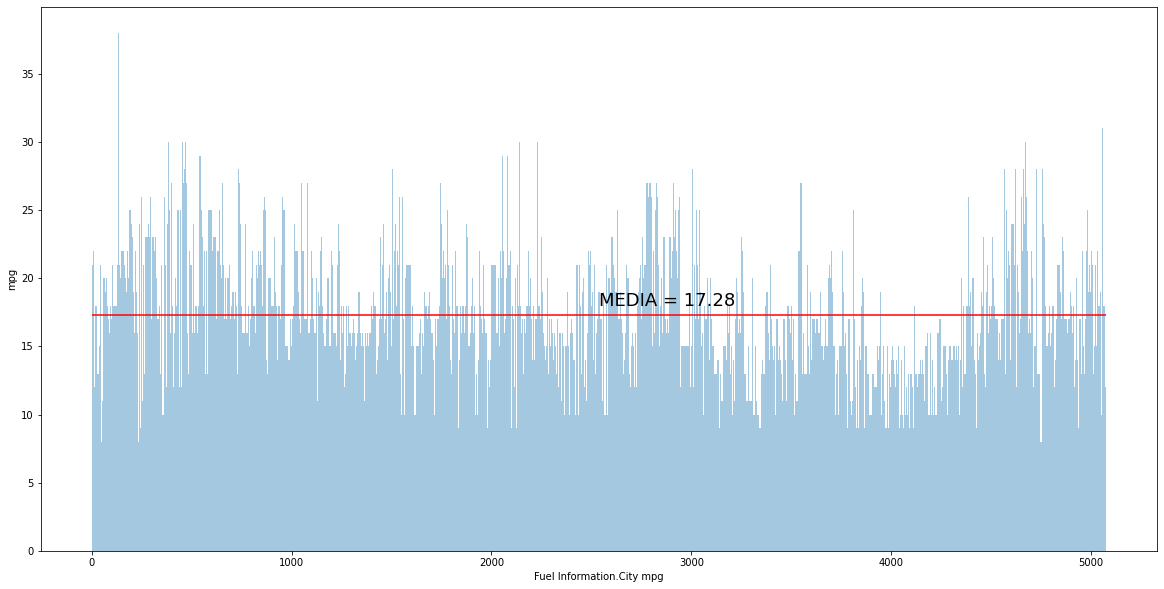

In [54]:
import numpy as np
import matplotlib.pyplot as plt

count = [i for i in range(len(fuel_info))]
plt.close("all")
plt.figure(figsize=(20,10))

plt.bar(count, fuel_info, width=1.0, alpha=0.4)
plt.xlabel(cap_tabel)
plt.ylabel("mpg")
plt.hlines(avg_fuel, xmin=0, xmax=len(fuel_info), colors='red')
plt.text(len(fuel_info)/2, 18, f"MEDIA = {round(avg_fuel,2)}", fontsize=18)
plt.show()